In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

# FLIPKART

# DATA COLLECTION

In [2]:
url=("https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on")

In [10]:
brand_name1=[]
models1=[]
colors1=[]
ram1=[]
rom1=[]
battery1=[]
ss1=[]
prices1=[]
#for i in range(2,10):
urls=("https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on")
print(urls)
page=requests.get(urls)
soup=BeautifulSoup(page.text)
    
    # 1) Prices
p=soup.find_all("div",class_="_30jeq3 _1_WHN1")
    
for i in p:
    prices1.append(i.text)
    
    # 2) Brand 
b=soup.find_all("div",class_="_4rR01T")
    
for i in b:
    brand_name1.append(i.text.split()[0])
    
    # 3) Brand Model
    
for i in b:
    models1.append(i.text.split()[1])
    
    # 4) Colors
    
for i in b:
    a=i.text
    if "(" in a:
        colors1.append(i.text.split("(")[1])
    else:
        colors1.append(np.nan)
    
    # 5) ROM

c=soup.find_all("li",class_="rgWa7D")   

for i in c:
    a=i.text
    b=re.findall(r"(\d+)\sGB\sROM",a)
    if len(b)>0:
        rom1.append(b[0])
        
        
    # 6) RAM

    
for i in c:
    a=i.text
    if "GB" in a:
        b=re.findall(r"(\d+)\sGB\sRAM",a)
        if len(b)>0:
            ram1.append(b[0])
    

        
    # 7) Battery
    
for i in c:
    a=i.text
    b=re.findall(r"(\d+)\smAh",a)
    if len(b)>0:
        battery1.append(b[0])
        
    # 8) Screen Size
    
for i in c:
    a=i.text
    b=re.findall(r"(\d+.\d+)\scm",a)
    if len(b)>0:
        ss1.append(b[0])


print("Brands------>",len(brand_name1))
print("Brand Model------>",len(models1))
print("Prices------>",len(prices1))
print("RAM------>",len(ram1))
print("Battery------>",len(battery1))
print("ss------>",len(ss1))
print("ROM------>",len(rom1))
print("Colors------>",len(colors1))

https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on
Brands------> 24
Brand Model------> 24
Prices------> 24
RAM------> 21
Battery------> 21
ss------> 24
ROM------> 24
Colors------> 24


In [11]:
24-len(ram1)

3

In [12]:
24-len(battery1)

3

In [13]:
ram1.insert(9,np.nan)
ram1.insert(13,np.nan)
ram1.insert(16,np.nan)

battery1.insert(9,np.nan)
battery1.insert(13,np.nan)
battery1.insert(16,np.nan)


In [14]:
Tablets_page1=pd.DataFrame({"Brands":brand_name1,"Model":models1,"Colors":colors1,"RAM":ram1,"ROM":rom1,"Battery":battery1,"Screen_Size":ss1,"Prices":prices1})

In [15]:
Tablets_page1

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,"₹24,999"
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.5,"₹47,999"
2,realme,Pad,Grey),4,64,7100,26.42,"₹16,499"
3,realme,Pad,Gold),4,64,7100,26.42,"₹16,499"
4,realme,Pad,Grey),3,32,7100,26.42,"₹11,999"
5,Lenovo,Tab,Platinum Grey),4,128,5000,26.16,"₹14,999"
6,MOTOROLA,Tab,Frost Blue),4,64,7700,26.95,"₹17,499"
7,realme,Pad,Blue),4,64,6400,22.1,"₹13,999"
8,realme,Pad,Glowing Grey),6,128,8340,27.94,"₹27,999"
9,realme,Pad,Glacier Blue),NaN,128,NaN,27.94,"₹27,999"


#  PAGES 2-30

In [52]:
brand_name1=[]
models1=[]
colors1=[]
ram1=[]
rom1=[]
battery1=[]
ss1=[]
prices1=[]
for i in range(2,31):
    urls=("https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on&page=")+str(i)
    print(urls)
    page=requests.get(urls)
    soup=BeautifulSoup(page.text)
    
    # 1) Prices
    p=soup.find_all("div",class_="_30jeq3 _1_WHN1")
    
    for i in p:
        prices1.append(i.text)
    
    # 2) Brand 
    b=soup.find_all("div",class_="_4rR01T")
    
    for i in b:
        brand_name1.append(i.text.split()[0])
    
    # 3) Brand Model
    
    for i in b:
        models1.append(i.text.split()[1])
    
    # 4) Colors
    
    for i in b:
        a=i.text
        if "(" in a:
            colors1.append(i.text.split("(")[1])
        else:
            colors1.append(np.nan)
    
    # 5) ROM

    c=soup.find_all("li",class_="rgWa7D")   

    for i in c:
        a=i.text
        b=re.findall(r"(\d+)\sGB\sROM",a)
        if len(b)>0:
            rom1.append(b[0])
        
        
    # 6) RAM

    
    for i in c:
        a=i.text
        if "GB" in a:
            b=re.findall(r"(\d+)\sGB\sRAM",a)
            if len(b)>0:
                ram1.append(b[0])
    
        
    # 7) Battery
    
    for i in c:
        a=i.text
        b=re.findall(r"Battery:\s(\d+)\smAh",a)
        if len(b)>0:
            battery1.append(b[0])
        b=re.findall(r"Battery:\s(\d+)\smAH",a)
        if len(b)>0:
            battery1.append(b[0])
        
        
    # 8) Screen Size
    
    for i in c:
        a=i.text
        b=re.findall(r"(\d+.\d+)\scm",a)
        if len(b)>0:
            ss1.append(b[0])


    print("Brands------>",len(brand_name1))
    print("Brand Model------>",len(models1))
    print("Prices------>",len(prices1))
    print("RAM------>",len(ram1))
    print("Battery------>",len(battery1))
    print("ss------>",len(ss1))
    print("ROM------>",len(rom1))
    print("Colors------>",len(colors1))

print("__________________")

print("Brands------>",len(brand_name1))
print("Brand Model------>",len(models1))
print("Prices------>",len(prices1))
print("RAM------>",len(ram1))
print("Battery------>",len(battery1))
print("ss------>",len(ss1))
print("ROM------>",len(rom1))
print("Colors------>",len(colors1))

https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on&page=2
Brands------> 24
Brand Model------> 24
Prices------> 24
RAM------> 13
Battery------> 15
ss------> 24
ROM------> 24
Colors------> 24
https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on&page=3
Brands------> 48
Brand Model------> 48
Prices------> 48
RAM------> 27
Battery------> 29
ss------> 48
ROM------> 48
Colors------> 48
https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_

Brands------> 456
Brand Model------> 456
Prices------> 456
RAM------> 260
Battery------> 193
ss------> 456
ROM------> 404
Colors------> 456
https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on&page=21
Brands------> 480
Brand Model------> 480
Prices------> 480
RAM------> 270
Battery------> 197
ss------> 480
ROM------> 425
Colors------> 480
https://www.flipkart.com/search?q=tablet&sid=tyy%2Chry&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=tablet%7CTablets&requestId=9434d183-f2b1-4e6a-967e-67722cbeece3&as-backfill=on&page=22
Brands------> 504
Brand Model------> 504
Prices------> 504
RAM------> 284
Battery------> 203
ss------> 504

# DATA CLEANING

# Replace the missing values with nan

In [53]:
696-len(ram1)

281

In [54]:
696-len(battery1)

389

In [55]:
696-len(rom1)

74

In [56]:
ram1.insert(6,np.nan)
ram1.insert(9,np.nan)
ram1.insert(10,np.nan)
ram1.insert(14,np.nan)
ram1.insert(16,np.nan)
ram1.insert(21,np.nan)
ram1.insert(26,np.nan)
ram1.insert(29,np.nan)
ram1.insert(33,np.nan)
ram1.insert(41,np.nan)
ram1.insert(42,np.nan)
ram1.insert(43,np.nan)
ram1.insert(44,np.nan)
ram1.insert(45,np.nan)
ram1.insert(46,np.nan)
ram1.insert(47,np.nan)
ram1.insert(48,np.nan)
ram1.insert(49,np.nan)
ram1.insert(52,np.nan)
ram1.insert(54,np.nan)
ram1.insert(56,np.nan)
ram1.insert(58,np.nan)
ram1.insert(60,np.nan)
ram1.insert(62,np.nan)
ram1.insert(63,np.nan)
ram1.insert(64,np.nan)
ram1.insert(65,np.nan)
ram1.insert(67,np.nan)
ram1.insert(69,np.nan)
ram1.insert(70,np.nan)
ram1.insert(77,np.nan)
ram1.insert(78,np.nan)
ram1.insert(79,np.nan)
ram1.insert(81,np.nan)
ram1.insert(82,np.nan)
ram1.insert(83,np.nan)
ram1.insert(85,np.nan)
ram1.insert(87,np.nan)
ram1.insert(89,np.nan)
ram1.insert(94,np.nan)
ram1.insert(103,np.nan)
ram1.insert(106,np.nan)
ram1.insert(108,np.nan)
ram1.insert(112,np.nan)
ram1.insert(114,np.nan)
ram1.insert(115,np.nan)
ram1.insert(117,np.nan)
ram1.insert(118,np.nan)
ram1.insert(119,np.nan)
ram1.insert(120,np.nan)
ram1.insert(121,np.nan)
ram1.insert(122,np.nan)
ram1.insert(126,np.nan)
ram1.insert(129,np.nan)
ram1.insert(140,np.nan)
ram1.insert(141,np.nan)
ram1.insert(143,np.nan)
ram1.insert(145,np.nan)
ram1.insert(146,np.nan)
ram1.insert(148,np.nan)
ram1.insert(149,np.nan)
ram1.insert(150,np.nan)
ram1.insert(151,np.nan)
ram1.insert(152,np.nan)
ram1.insert(153,np.nan)
ram1.insert(154,np.nan)
ram1.insert(155,np.nan)
ram1.insert(156,np.nan)
ram1.insert(158,np.nan)
ram1.insert(159,np.nan)
ram1.insert(161,np.nan)
ram1.insert(163,np.nan)
ram1.insert(168,np.nan)
ram1.insert(169,np.nan)
ram1.insert(170,np.nan)
ram1.insert(171,np.nan)
ram1.insert(172,np.nan)
ram1.insert(174,np.nan)
ram1.insert(175,np.nan)
ram1.insert(176,np.nan)
ram1.insert(178,np.nan)
ram1.insert(179,np.nan)
ram1.insert(180,np.nan)
ram1.insert(181,np.nan)
ram1.insert(182,np.nan)
ram1.insert(183,np.nan)
ram1.insert(185,np.nan)
ram1.insert(186,np.nan)
ram1.insert(187,np.nan)
ram1.insert(188,np.nan)
ram1.insert(190,np.nan)
ram1.insert(193,np.nan)
ram1.insert(194,np.nan)
ram1.insert(196,np.nan)
ram1.insert(197,np.nan)
ram1.insert(198,np.nan)
ram1.insert(199,np.nan)
ram1.insert(200,np.nan)
ram1.insert(202,np.nan)
ram1.insert(203,np.nan)
ram1.insert(207,np.nan)
ram1.insert(208,np.nan)
ram1.insert(209,np.nan)
ram1.insert(210,np.nan)
ram1.insert(211,np.nan)
ram1.insert(213,np.nan)
ram1.insert(215,np.nan)
ram1.insert(216,np.nan)
ram1.insert(217,np.nan)
ram1.insert(220,np.nan)
ram1.insert(221,np.nan)
ram1.insert(225,np.nan)
ram1.insert(231,np.nan)
ram1.insert(232,np.nan)
ram1.insert(233,np.nan)
ram1.insert(234,np.nan)
ram1.insert(235,np.nan)
ram1.insert(239,np.nan)
ram1.insert(250,np.nan)
ram1.insert(253,np.nan)
ram1.insert(254,np.nan)
ram1.insert(258,np.nan)
ram1.insert(261,np.nan)
ram1.insert(264,np.nan)
ram1.insert(265,np.nan)
ram1.insert(280,np.nan)
ram1.insert(281,np.nan)
ram1.insert(284,np.nan)
ram1.insert(294,np.nan)
ram1.insert(295,np.nan)
ram1.insert(300,np.nan)
ram1.insert(301,np.nan)
ram1.insert(302,np.nan)
ram1.insert(305,np.nan)
ram1.insert(306,np.nan)
ram1.insert(309,np.nan)
ram1.insert(311,np.nan)
ram1.insert(312,np.nan)
ram1.insert(314,np.nan)
ram1.insert(315,np.nan)
ram1.insert(316,np.nan)
ram1.insert(318,np.nan)
ram1.insert(322,np.nan)
ram1.insert(323,np.nan)
ram1.insert(324,np.nan)
ram1.insert(325,np.nan)
ram1.insert(326,np.nan)
ram1.insert(327,np.nan)
ram1.insert(331,np.nan)
ram1.insert(332,np.nan)
ram1.insert(333,np.nan)
ram1.insert(334,np.nan)
ram1.insert(336,np.nan)
ram1.insert(338,np.nan)
ram1.insert(341,np.nan)
ram1.insert(346,np.nan)
ram1.insert(348,np.nan)
ram1.insert(349,np.nan)
ram1.insert(352,np.nan)
ram1.insert(354,np.nan)
ram1.insert(366,np.nan)
ram1.insert(368,np.nan)
ram1.insert(377,np.nan)
ram1.insert(380,np.nan)
ram1.insert(381,np.nan)
ram1.insert(382,np.nan)
ram1.insert(383,np.nan)
ram1.insert(384,np.nan)
ram1.insert(385,np.nan)
ram1.insert(388,np.nan)
ram1.insert(389,np.nan)
ram1.insert(391,np.nan)
ram1.insert(392,np.nan)
ram1.insert(393,np.nan)
ram1.insert(394,np.nan)
ram1.insert(395,np.nan)
ram1.insert(396,np.nan)
ram1.insert(398,np.nan)
ram1.insert(399,np.nan)
ram1.insert(400,np.nan)
ram1.insert(401,np.nan)
ram1.insert(402,np.nan)
ram1.insert(403,np.nan)
ram1.insert(405,np.nan)
ram1.insert(406,np.nan)
ram1.insert(407,np.nan)
ram1.insert(408,np.nan)
ram1.insert(409,np.nan)
ram1.insert(410,np.nan)
ram1.insert(411,np.nan)
ram1.insert(412,np.nan)
ram1.insert(413,np.nan)
ram1.insert(414,np.nan)
ram1.insert(415,np.nan)
ram1.insert(416,np.nan)
ram1.insert(417,np.nan)
ram1.insert(418,np.nan)
ram1.insert(419,np.nan)
ram1.insert(421,np.nan)
ram1.insert(422,np.nan)
ram1.insert(423,np.nan)
ram1.insert(424,np.nan)
ram1.insert(425,np.nan)
ram1.insert(428,np.nan)
ram1.insert(429,np.nan)
ram1.insert(431,np.nan)
ram1.insert(433,np.nan)
ram1.insert(435,np.nan)
ram1.insert(436,np.nan)
ram1.insert(437,np.nan)
ram1.insert(438,np.nan)
ram1.insert(440,np.nan)
ram1.insert(441,np.nan)
ram1.insert(442,np.nan)
ram1.insert(443,np.nan)
ram1.insert(444,np.nan)
ram1.insert(445,np.nan)
ram1.insert(446,np.nan)
ram1.insert(447,np.nan)
ram1.insert(448,np.nan)
ram1.insert(449,np.nan)
ram1.insert(450,np.nan)
ram1.insert(451,np.nan)
ram1.insert(452,np.nan)
ram1.insert(453,np.nan)
ram1.insert(455,np.nan)
ram1.insert(458,np.nan)
ram1.insert(460,np.nan)
ram1.insert(462,np.nan)
ram1.insert(463,np.nan)
ram1.insert(464,np.nan)
ram1.insert(466,np.nan)
ram1.insert(467,np.nan)
ram1.insert(468,np.nan)
ram1.insert(469,np.nan)
ram1.insert(471,np.nan)
ram1.insert(472,np.nan)
ram1.insert(473,np.nan)
ram1.insert(474,np.nan)
ram1.insert(475,np.nan)
ram1.insert(476,np.nan)
ram1.insert(478,np.nan)
ram1.insert(479,np.nan)
ram1.insert(480,np.nan)
ram1.insert(481,np.nan)
ram1.insert(482,np.nan)
ram1.insert(484,np.nan)
ram1.insert(485,np.nan)
ram1.insert(486,np.nan)
ram1.insert(488,np.nan)
ram1.insert(492,np.nan)
ram1.insert(494,np.nan)
ram1.insert(498,np.nan)
ram1.insert(500,np.nan)
ram1.insert(501,np.nan)
ram1.insert(502,np.nan)
ram1.insert(506,np.nan)
ram1.insert(507,np.nan)
ram1.insert(508,np.nan)
ram1.insert(509,np.nan)
ram1.insert(512,np.nan)
ram1.insert(513,np.nan)
ram1.insert(514,np.nan)
ram1.insert(515,np.nan)
ram1.insert(516,np.nan)
ram1.insert(517,np.nan)
ram1.insert(518,np.nan)
ram1.insert(519,np.nan)
ram1.insert(520,np.nan)
ram1.insert(526,np.nan)
ram1.insert(527,np.nan)
ram1.insert(529,np.nan)
ram1.insert(530,np.nan)
ram1.insert(531,np.nan)
ram1.insert(533,np.nan)
ram1.insert(534,np.nan)
ram1.insert(535,np.nan)
ram1.insert(537,np.nan)
ram1.insert(538,np.nan)
ram1.insert(540,np.nan)
ram1.insert(541,np.nan)
#ram1.insert(542,np.nan)
#ram1.insert(544,np.nan)
#ram1.insert(546,np.nan)
#ram1.insert(547,np.nan)
#ram1.insert(549,np.nan)
#ram1.insert(550,np.nan)
#ram1.insert(551,np.nan)
#ram1.insert(552,np.nan)
#ram1.insert(553,np.nan)
#ram1.insert(554,np.nan)
#ram1.insert(555,np.nan)
#ram1.insert(556,np.nan)
#ram1.insert(557,np.nan)
#ram1.insert(559,np.nan)
#ram1.insert(560,np.nan)
#ram1.insert(561,np.nan)
#ram1.insert(563,np.nan)
#ram1.insert(567,np.nan)
#ram1.insert(568,np.nan)
#ram1.insert(570,np.nan)
#ram1.insert(571,np.nan)
#ram1.insert(572,np.nan)
#ram1.insert(573,np.nan)
#ram1.insert(574,np.nan)
#ram1.insert(577,np.nan)
#ram1.insert(578,np.nan)
#ram1.insert(581,np.nan)
#ram1.insert(583,np.nan)
#ram1.insert(585,np.nan)
#ram1.insert(586,np.nan)
#ram1.insert(589,np.nan)
#ram1.insert(590,np.nan)
#ram1.insert(591,np.nan)
#ram1.insert(592,np.nan)
#ram1.insert(594,np.nan)
#ram1.insert(598,np.nan)
#ram1.insert(604,np.nan)
#ram1.insert(605,np.nan)
#ram1.insert(608,np.nan)
#ram1.insert(610,np.nan)
#ram1.insert(611,np.nan)
#ram1.insert(619,np.nan)
#ram1.insert(620,np.nan)
#ram1.insert(624,np.nan)
#ram1.insert(625,np.nan)
#ram1.insert(635,np.nan)
#ram1.insert(653,np.nan)
#ram1.insert(655,np.nan)
#ram1.insert(656,np.nan)
#ram1.insert(657,np.nan)
#ram1.insert(659,np.nan)
#ram1.insert(660,np.nan)
#ram1.insert(665,np.nan)
#ram1.insert(668,np.nan)
#ram1.insert(670,np.nan)
#ram1.insert(673,np.nan)
#ram1.insert(675,np.nan)
#ram1.insert(680,np.nan)
#ram1.insert(687,np.nan)
#ram1.insert(688,np.nan)
#ram1.insert(689,np.nan)
#ram1.insert(690,np.nan)
#ram1.insert(691,np.nan)
#ram1.insert(692,np.nan)
#ram1.insert(693,np.nan)
#ram1.insert(694,np.nan)
#ram1.insert(695,np.nan)



In [57]:
len(ram1)

696

In [58]:
battery1.insert(0,np.nan)
battery1.insert(6,np.nan)
battery1.insert(9,np.nan)
battery1.insert(10,np.nan)
battery1.insert(14,np.nan)
battery1.insert(16,np.nan)
battery1.insert(18,np.nan)
battery1.insert(20,np.nan)
battery1.insert(21,np.nan)
battery1.insert(22,np.nan)
battery1.insert(26,np.nan)
battery1.insert(27,np.nan)
battery1.insert(29,np.nan)
battery1.insert(33,np.nan)
battery1.insert(35,np.nan)
battery1.insert(36,np.nan)
battery1.insert(39,np.nan)
battery1.insert(41,np.nan)
battery1.insert(42,np.nan)
battery1.insert(43,np.nan)
battery1.insert(44,np.nan)
battery1.insert(45,np.nan)
battery1.insert(46,np.nan)
battery1.insert(47,np.nan)
battery1.insert(48,np.nan)
battery1.insert(49,np.nan)
battery1.insert(52,np.nan)
battery1.insert(54,np.nan)
battery1.insert(56,np.nan)
battery1.insert(58,np.nan)
battery1.insert(60,np.nan)
battery1.insert(62,np.nan)
battery1.insert(63,np.nan)
battery1.insert(64,np.nan)
battery1.insert(65,np.nan)
battery1.insert(67,np.nan)
battery1.insert(69,np.nan)
battery1.insert(70,np.nan)
battery1.insert(77,np.nan)
battery1.insert(78,np.nan)
battery1.insert(79,np.nan)
battery1.insert(81,np.nan)
battery1.insert(82,np.nan)
battery1.insert(83,np.nan)
battery1.insert(85,np.nan)
battery1.insert(87,np.nan)
battery1.insert(89,np.nan)
battery1.insert(90,np.nan)
battery1.insert(93,np.nan)
battery1.insert(94,np.nan)
battery1.insert(96,np.nan)
battery1.insert(97,np.nan)
battery1.insert(100,np.nan)
battery1.insert(103,np.nan)
battery1.insert(106,np.nan)
battery1.insert(108,np.nan)
battery1.insert(112,np.nan)
battery1.insert(114,np.nan)
battery1.insert(115,np.nan)
battery1.insert(117,np.nan)
battery1.insert(118,np.nan)
battery1.insert(119,np.nan)
battery1.insert(120,np.nan)
battery1.insert(121,np.nan)
battery1.insert(122,np.nan)
battery1.insert(126,np.nan)
battery1.insert(129,np.nan)
battery1.insert(130,np.nan)
battery1.insert(132,np.nan)
battery1.insert(133,np.nan)
battery1.insert(134,np.nan)
battery1.insert(136,np.nan)
battery1.insert(137,np.nan)
battery1.insert(138,np.nan)
battery1.insert(140,np.nan)
battery1.insert(141,np.nan)
battery1.insert(143,np.nan)
battery1.insert(145,np.nan)
battery1.insert(146,np.nan)
battery1.insert(148,np.nan)
battery1.insert(149,np.nan)
battery1.insert(150,np.nan)
battery1.insert(151,np.nan)
battery1.insert(152,np.nan)
battery1.insert(153,np.nan)
battery1.insert(154,np.nan)
battery1.insert(155,np.nan)
battery1.insert(156,np.nan)
battery1.insert(158,np.nan)
battery1.insert(161,np.nan)
battery1.insert(163,np.nan)
battery1.insert(168,np.nan)
battery1.insert(169,np.nan)
battery1.insert(170,np.nan)
battery1.insert(171,np.nan)
battery1.insert(172,np.nan)
battery1.insert(174,np.nan)
battery1.insert(175,np.nan)
battery1.insert(176,np.nan)
battery1.insert(178,np.nan)
battery1.insert(179,np.nan)
battery1.insert(180,np.nan)
battery1.insert(181,np.nan)
battery1.insert(182,np.nan)
battery1.insert(183,np.nan)
battery1.insert(185,np.nan)
battery1.insert(186,np.nan)
battery1.insert(187,np.nan)
battery1.insert(188,np.nan)
battery1.insert(190,np.nan)
battery1.insert(193,np.nan)
battery1.insert(194,np.nan)
battery1.insert(196,np.nan)
battery1.insert(197,np.nan)
battery1.insert(198,np.nan)
battery1.insert(199,np.nan)
battery1.insert(200,np.nan)
battery1.insert(202,np.nan)
battery1.insert(203,np.nan)
battery1.insert(207,np.nan)
battery1.insert(208,np.nan)
battery1.insert(209,np.nan)
battery1.insert(210,np.nan)
battery1.insert(211,np.nan)
battery1.insert(213,np.nan)
battery1.insert(215,np.nan)
battery1.insert(216,np.nan)
battery1.insert(217,np.nan)
battery1.insert(220,np.nan)
battery1.insert(221,np.nan)
battery1.insert(225,np.nan)
battery1.insert(231,np.nan)
battery1.insert(232,np.nan)
battery1.insert(233,np.nan)
battery1.insert(234,np.nan)
battery1.insert(235,np.nan)
battery1.insert(239,np.nan)
battery1.insert(250,np.nan)
battery1.insert(253,np.nan)
battery1.insert(254,np.nan)
battery1.insert(258,np.nan)
battery1.insert(261,np.nan)
battery1.insert(264,np.nan)
battery1.insert(265,np.nan)
battery1.insert(280,np.nan)
battery1.insert(281,np.nan)
battery1.insert(284,np.nan)
battery1.insert(294,np.nan)
battery1.insert(295,np.nan)
battery1.insert(300,np.nan)
battery1.insert(301,np.nan)
battery1.insert(302,np.nan)
battery1.insert(305,np.nan)
battery1.insert(306,np.nan)
battery1.insert(309,np.nan)
battery1.insert(311,np.nan)
battery1.insert(312,np.nan)
battery1.insert(314,np.nan)
battery1.insert(315,np.nan)
battery1.insert(316,np.nan)
battery1.insert(318,np.nan)
battery1.insert(322,np.nan)
battery1.insert(323,np.nan)
battery1.insert(324,np.nan)
battery1.insert(325,np.nan)
battery1.insert(326,np.nan)
battery1.insert(327,np.nan)
battery1.insert(331,np.nan)
battery1.insert(332,np.nan)
battery1.insert(333,np.nan)
battery1.insert(334,np.nan)
battery1.insert(336,np.nan)
battery1.insert(338,np.nan)
battery1.insert(341,np.nan)
battery1.insert(344,np.nan)
battery1.insert(346,np.nan)
battery1.insert(348,np.nan)
battery1.insert(349,np.nan)
battery1.insert(352,np.nan)
battery1.insert(354,np.nan)
battery1.insert(366,np.nan)
battery1.insert(368,np.nan)
battery1.insert(377,np.nan)
battery1.insert(380,np.nan)
battery1.insert(381,np.nan)
battery1.insert(382,np.nan)
battery1.insert(383,np.nan)
battery1.insert(384,np.nan)
battery1.insert(385,np.nan)
battery1.insert(388,np.nan)
battery1.insert(389,np.nan)
battery1.insert(391,np.nan)
battery1.insert(392,np.nan)
battery1.insert(393,np.nan)
battery1.insert(394,np.nan)
battery1.insert(395,np.nan)
battery1.insert(396,np.nan)
battery1.insert(398,np.nan)
battery1.insert(399,np.nan)
battery1.insert(400,np.nan)
battery1.insert(401,np.nan)
battery1.insert(402,np.nan)
battery1.insert(403,np.nan)
battery1.insert(405,np.nan)
battery1.insert(406,np.nan)
battery1.insert(407,np.nan)
battery1.insert(408,np.nan)
battery1.insert(409,np.nan)
battery1.insert(410,np.nan)
battery1.insert(411,np.nan)
battery1.insert(412,np.nan)
battery1.insert(413,np.nan)
battery1.insert(414,np.nan)
battery1.insert(415,np.nan)
battery1.insert(416,np.nan)
battery1.insert(417,np.nan)
battery1.insert(418,np.nan)
battery1.insert(419,np.nan)
battery1.insert(421,np.nan)
battery1.insert(422,np.nan)
battery1.insert(423,np.nan)
battery1.insert(424,np.nan)
battery1.insert(425,np.nan)
battery1.insert(428,np.nan)
battery1.insert(429,np.nan)
battery1.insert(431,np.nan)
battery1.insert(433,np.nan)
battery1.insert(435,np.nan)
battery1.insert(436,np.nan)
battery1.insert(437,np.nan)
battery1.insert(438,np.nan)
battery1.insert(440,np.nan)
battery1.insert(441,np.nan)
battery1.insert(442,np.nan)
battery1.insert(443,np.nan)
battery1.insert(444,np.nan)
battery1.insert(445,np.nan)
battery1.insert(446,np.nan)
battery1.insert(447,np.nan)
battery1.insert(448,np.nan)
battery1.insert(449,np.nan)
battery1.insert(450,np.nan)
battery1.insert(451,np.nan)
battery1.insert(452,np.nan)
battery1.insert(453,np.nan)
battery1.insert(455,np.nan)
battery1.insert(460,np.nan)
battery1.insert(462,np.nan)
battery1.insert(463,np.nan)
battery1.insert(464,np.nan)
battery1.insert(466,np.nan)
battery1.insert(467,np.nan)
battery1.insert(468,np.nan)
battery1.insert(469,np.nan)
battery1.insert(471,np.nan)
battery1.insert(473,np.nan)
battery1.insert(474,np.nan)
battery1.insert(475,np.nan)
battery1.insert(476,np.nan)
battery1.insert(478,np.nan)
battery1.insert(472,np.nan)
battery1.insert(479,np.nan)
battery1.insert(480,np.nan)
battery1.insert(481,np.nan)
battery1.insert(482,np.nan)
battery1.insert(484,np.nan)
battery1.insert(485,np.nan)
battery1.insert(486,np.nan)
battery1.insert(488,np.nan)
battery1.insert(492,np.nan)
battery1.insert(494,np.nan)
battery1.insert(498,np.nan)
battery1.insert(500,np.nan)
battery1.insert(501,np.nan)
battery1.insert(502,np.nan)
battery1.insert(506,np.nan)
battery1.insert(507,np.nan)
battery1.insert(508,np.nan)
battery1.insert(509,np.nan)
battery1.insert(512,np.nan)
battery1.insert(513,np.nan)
battery1.insert(514,np.nan)
battery1.insert(515,np.nan)
battery1.insert(516,np.nan)
battery1.insert(517,np.nan)
battery1.insert(518,np.nan)
battery1.insert(519,np.nan)
battery1.insert(520,np.nan)
battery1.insert(526,np.nan)
battery1.insert(527,np.nan)
battery1.insert(529,np.nan)
battery1.insert(530,np.nan)
battery1.insert(531,np.nan)
battery1.insert(533,np.nan)
battery1.insert(534,np.nan)
battery1.insert(535,np.nan)
battery1.insert(537,np.nan)
battery1.insert(538,np.nan)
battery1.insert(540,np.nan)
battery1.insert(541,np.nan)
battery1.insert(542,np.nan)
battery1.insert(544,np.nan)
battery1.insert(546,np.nan)
battery1.insert(547,np.nan)
battery1.insert(549,np.nan)
battery1.insert(550,np.nan)
battery1.insert(551,np.nan)
battery1.insert(552,np.nan)
battery1.insert(553,np.nan)
battery1.insert(554,np.nan)
battery1.insert(555,np.nan)
battery1.insert(556,np.nan)
battery1.insert(557,np.nan)
battery1.insert(559,np.nan)
battery1.insert(560,np.nan)
battery1.insert(561,np.nan)
battery1.insert(563,np.nan)
battery1.insert(567,np.nan)
battery1.insert(568,np.nan)
battery1.insert(570,np.nan)
battery1.insert(571,np.nan)
battery1.insert(572,np.nan)
battery1.insert(573,np.nan)
battery1.insert(574,np.nan)
battery1.insert(577,np.nan)
battery1.insert(578,np.nan)
battery1.insert(581,np.nan)
battery1.insert(583,np.nan)
battery1.insert(585,np.nan)
battery1.insert(586,np.nan)
battery1.insert(589,np.nan)
battery1.insert(590,np.nan)
battery1.insert(591,np.nan)
battery1.insert(592,np.nan)
battery1.insert(594,np.nan)
battery1.insert(598,np.nan)
battery1.insert(604,np.nan)
battery1.insert(605,np.nan)
battery1.insert(608,np.nan)
battery1.insert(610,np.nan)
battery1.insert(611,np.nan)
battery1.insert(619,np.nan)
battery1.insert(620,np.nan)
battery1.insert(624,np.nan)
battery1.insert(625,np.nan)
battery1.insert(635,np.nan)
battery1.insert(637,np.nan)
battery1.insert(638,np.nan)
battery1.insert(639,np.nan)
battery1.insert(640,np.nan)
battery1.insert(641,np.nan)
battery1.insert(642,np.nan)
battery1.insert(644,np.nan)
battery1.insert(645,np.nan)
battery1.insert(648,np.nan)
battery1.insert(649,np.nan)
battery1.insert(650,np.nan)
battery1.insert(652,np.nan)
battery1.insert(653,np.nan)
battery1.insert(655,np.nan)
battery1.insert(656,np.nan)
battery1.insert(657,np.nan)
battery1.insert(659,np.nan)
battery1.insert(660,np.nan)
battery1.insert(665,np.nan)
battery1.insert(668,np.nan)
battery1.insert(670,np.nan)
battery1.insert(673,np.nan)
battery1.insert(675,np.nan)
battery1.insert(680,np.nan)
battery1.insert(687,np.nan)
battery1.insert(690,np.nan)
battery1.insert(692,np.nan)
battery1.insert(695,np.nan)
battery1.insert(665,np.nan)
battery1.insert(668,np.nan)
battery1.insert(670,np.nan)
battery1.insert(673,np.nan)
battery1.insert(675,np.nan)
battery1.insert(680,np.nan)
battery1.insert(687,np.nan)
battery1.insert(690,np.nan)
battery1.insert(692,np.nan)
battery1.insert(695,np.nan)
battery1.insert(665,np.nan)
battery1.insert(668,np.nan)
battery1.insert(670,np.nan)
battery1.insert(673,np.nan)
battery1.insert(675,np.nan)
#battery1.insert(680,np.nan)
#battery1.insert(687,np.nan)
#battery1.insert(690,np.nan)
#battery1.insert(692,np.nan)
#battery1.insert(695,np.nan)


In [59]:
len(battery1)

696

In [60]:
rom1.insert(77,np.nan)
rom1.insert(78,np.nan)
rom1.insert(79,np.nan)
rom1.insert(81,np.nan)
rom1.insert(85,np.nan)
rom1.insert(87,np.nan)
rom1.insert(103,np.nan)
rom1.insert(108,np.nan)
rom1.insert(112,np.nan)
rom1.insert(118,np.nan)
rom1.insert(120,np.nan)
rom1.insert(122,np.nan)
rom1.insert(126,np.nan)
rom1.insert(129,np.nan)
rom1.insert(130,np.nan)
rom1.insert(132,np.nan)
rom1.insert(140,np.nan)
rom1.insert(145,np.nan)
rom1.insert(148,np.nan)
rom1.insert(152,np.nan)
rom1.insert(153,np.nan)
rom1.insert(154,np.nan)
rom1.insert(155,np.nan)
rom1.insert(157,np.nan)
rom1.insert(159,np.nan)
rom1.insert(161,np.nan)
rom1.insert(163,np.nan)
rom1.insert(169,np.nan)
rom1.insert(171,np.nan)
rom1.insert(174,np.nan)
rom1.insert(178,np.nan)
rom1.insert(181,np.nan)
rom1.insert(185,np.nan)
rom1.insert(188,np.nan)
rom1.insert(193,np.nan)
rom1.insert(197,np.nan)
rom1.insert(199,np.nan)
rom1.insert(200,np.nan)
rom1.insert(210,np.nan)
rom1.insert(213,np.nan)
rom1.insert(215,np.nan)
rom1.insert(219,np.nan)
rom1.insert(221,np.nan)
rom1.insert(225,np.nan)
rom1.insert(231,np.nan)
rom1.insert(235,np.nan)
rom1.insert(250,np.nan)
rom1.insert(258,np.nan)
rom1.insert(261,np.nan)
rom1.insert(280,np.nan)
rom1.insert(295,np.nan)
rom1.insert(322,np.nan)
rom1.insert(338,np.nan)
rom1.insert(377,np.nan)
rom1.insert(395,np.nan)
rom1.insert(408,np.nan)
rom1.insert(419,np.nan)
rom1.insert(429,np.nan)
rom1.insert(441,np.nan)
rom1.insert(448,np.nan)
rom1.insert(452,np.nan)
rom1.insert(455,np.nan)
rom1.insert(458,np.nan)
rom1.insert(464,np.nan)
rom1.insert(471,np.nan)
rom1.insert(473,np.nan)
rom1.insert(478,np.nan)
rom1.insert(479,np.nan)
rom1.insert(481,np.nan)
rom1.insert(485,np.nan)
rom1.insert(488,np.nan)
rom1.insert(492,np.nan)
rom1.insert(498,np.nan)
rom1.insert(500,np.nan)
#rom1.insert(502,np.nan)
#rom1.insert(507,np.nan)
#rom1.insert(512,np.nan)
#rom1.insert(516,np.nan)
#rom1.insert(527,np.nan)
#rom1.insert(534,np.nan)
#rom1.insert(542,np.nan)
#rom1.insert(556,np.nan)
#rom1.insert(563,np.nan)
#rom1.insert(577,np.nan)
#rom1.insert(583,np.nan)
#rom1.insert(608,np.nan)
#rom1.insert(635,np.nan)
#rom1.insert(653,np.nan)
#rom1.insert(657,np.nan)
#rom1.insert(665,np.nan)
#rom1.insert(670,np.nan)
#rom1.insert(675,np.nan)
#rom1.insert(680,np.nan)
#rom1.insert(687,np.nan)


In [61]:
len(rom1)

696

In [62]:
Tablets_page_2to30=pd.DataFrame({"Brands":brand_name1,"Model":models1,"Colors":colors1,"RAM":ram1,"ROM":rom1,"Battery":battery1,"Screen_Size":ss1,"Prices":prices1})

In [63]:
Tablets_page_2to30

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,APPLE,iPad,10th Gen) 256 GB ROM 10.9 inch with Wi-Fi Only,3,256,NaN,27.69,"₹57,500"
1,APPLE,iPad,10th Gen) 256 GB ROM 10.9 inch with Wi-Fi Only,6,256,6400,27.69,"₹57,500"
2,realme,Pad,Grey),6,32,6400,22.1,"₹8,999"
3,realme,Pad,Grey),4,128,7100,26.42,"₹19,999"
4,realme,Pad,Gold),3,128,7100,26.42,"₹19,999"
...,...,...,...,...,...,...,...,...
691,SAMSUNG,Galaxy,Black),1,32,NaN,20.32,"₹11,999"
692,I,Kall,Black),6,4,NaN,17.78,"₹3,799"
693,I,Kall,White),2,4,NaN,17.78,"₹3,999"
694,Wishtel,Ira,Black),4,8,NaN,17.78,"₹4,713"


In [64]:
Tablets=pd.concat([Tablets_page1,Tablets_page_2to30],axis=0)

In [65]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,"₹24,999"
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.5,"₹47,999"
2,realme,Pad,Grey),4,64,7100,26.42,"₹16,499"
3,realme,Pad,Gold),4,64,7100,26.42,"₹16,499"
4,realme,Pad,Grey),3,32,7100,26.42,"₹11,999"
...,...,...,...,...,...,...,...,...
691,SAMSUNG,Galaxy,Black),1,32,NaN,20.32,"₹11,999"
692,I,Kall,Black),6,4,NaN,17.78,"₹3,799"
693,I,Kall,White),2,4,NaN,17.78,"₹3,999"
694,Wishtel,Ira,Black),4,8,NaN,17.78,"₹4,713"


# CREATING CSV FILE

In [66]:
Tablets.to_csv(r"C:\Users\sowjanya\Desktop\CSV Files\Tablets Data.csv")

In [67]:
Tablets = Tablets.reset_index()

In [68]:
Tablets

,index,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,"₹24,999"
1,1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.5,"₹47,999"
2,2,realme,Pad,Grey),4,64,7100,26.42,"₹16,499"
3,3,realme,Pad,Gold),4,64,7100,26.42,"₹16,499"
4,4,realme,Pad,Grey),3,32,7100,26.42,"₹11,999"
...,...,...,...,...,...,...,...,...,...
715,691,SAMSUNG,Galaxy,Black),1,32,NaN,20.32,"₹11,999"
716,692,I,Kall,Black),6,4,NaN,17.78,"₹3,799"
717,693,I,Kall,White),2,4,NaN,17.78,"₹3,999"
718,694,Wishtel,Ira,Black),4,8,NaN,17.78,"₹4,713"


In [69]:
Tablets.drop(['index'],axis=1,inplace=True)

In [70]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,"₹24,999"
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.5,"₹47,999"
2,realme,Pad,Grey),4,64,7100,26.42,"₹16,499"
3,realme,Pad,Gold),4,64,7100,26.42,"₹16,499"
4,realme,Pad,Grey),3,32,7100,26.42,"₹11,999"
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,NaN,20.32,"₹11,999"
716,I,Kall,Black),6,4,NaN,17.78,"₹3,799"
717,I,Kall,White),2,4,NaN,17.78,"₹3,999"
718,Wishtel,Ira,Black),4,8,NaN,17.78,"₹4,713"


In [71]:
Tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brands       720 non-null    object
 1   Model        720 non-null    object
 2   Colors       707 non-null    object
 3   RAM          436 non-null    object
 4   ROM          646 non-null    object
 5   Battery      328 non-null    object
 6   Screen_Size  720 non-null    object
 7   Prices       720 non-null    object
dtypes: object(8)
memory usage: 45.1+ KB


In [72]:
Tablets['Battery'].fillna("0",inplace=True)
Tablets['RAM'].fillna("0",inplace=True)
Tablets['ROM'].fillna("0",inplace=True)
Tablets['Colors'].fillna("0",inplace=True)

In [73]:
Tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brands       720 non-null    object
 1   Model        720 non-null    object
 2   Colors       720 non-null    object
 3   RAM          720 non-null    object
 4   ROM          720 non-null    object
 5   Battery      720 non-null    object
 6   Screen_Size  720 non-null    object
 7   Prices       720 non-null    object
dtypes: object(8)
memory usage: 45.1+ KB


In [74]:
Tablets['RAM'] = Tablets['RAM'].astype("int")
Tablets['ROM'] = Tablets['ROM'].astype("int")
Tablets['Battery'] = Tablets['Battery'].astype("int")
Tablets['Screen_Size'] = Tablets['Screen_Size'].astype("float")

In [75]:
Tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brands       720 non-null    object 
 1   Model        720 non-null    object 
 2   Colors       720 non-null    object 
 3   RAM          720 non-null    int32  
 4   ROM          720 non-null    int32  
 5   Battery      720 non-null    int32  
 6   Screen_Size  720 non-null    float64
 7   Prices       720 non-null    object 
dtypes: float64(1), int32(3), object(4)
memory usage: 36.7+ KB


In [76]:
Tablets['Prices'] = list(map(lambda x:x.replace("₹","").replace(",",""),Tablets['Prices']))

In [77]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,realme,Pad,Grey),4,64,7100,26.42,16499
3,realme,Pad,Gold),4,64,7100,26.42,16499
4,realme,Pad,Grey),3,32,7100,26.42,11999
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,0,20.32,11999
716,I,Kall,Black),6,4,0,17.78,3799
717,I,Kall,White),2,4,0,17.78,3999
718,Wishtel,Ira,Black),4,8,0,17.78,4713


In [78]:
Tablets['Prices'] = Tablets['Prices'].astype("int")

In [79]:
Tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brands       720 non-null    object 
 1   Model        720 non-null    object 
 2   Colors       720 non-null    object 
 3   RAM          720 non-null    int32  
 4   ROM          720 non-null    int32  
 5   Battery      720 non-null    int32  
 6   Screen_Size  720 non-null    float64
 7   Prices       720 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 33.9+ KB


In [80]:
ROM_col=Tablets["ROM"]
ROM_col.replace(to_replace=0,value=ROM_col.median(),inplace=True)

In [81]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,realme,Pad,Grey),4,64,7100,26.42,16499
3,realme,Pad,Gold),4,64,7100,26.42,16499
4,realme,Pad,Grey),3,32,7100,26.42,11999
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,0,20.32,11999
716,I,Kall,Black),6,4,0,17.78,3799
717,I,Kall,White),2,4,0,17.78,3999
718,Wishtel,Ira,Black),4,8,0,17.78,4713


In [82]:
Tablets["ROM"].isnull().sum()

0

In [83]:
RAM_col=Tablets["RAM"]
RAM_col.replace(to_replace=0,value=RAM_col.median(),inplace=True)

In [84]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,realme,Pad,Grey),4,64,7100,26.42,16499
3,realme,Pad,Gold),4,64,7100,26.42,16499
4,realme,Pad,Grey),3,32,7100,26.42,11999
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,0,20.32,11999
716,I,Kall,Black),6,4,0,17.78,3799
717,I,Kall,White),2,4,0,17.78,3999
718,Wishtel,Ira,Black),4,8,0,17.78,4713


In [85]:
Tablets["RAM"].isnull().sum()

0

In [86]:
Tablets["Colors"].isnull().sum()

0

In [87]:
Tablets["Brands"].isnull().sum()

0

In [88]:
Tablets["Model"].isnull().sum()

0

In [89]:
Tablets["Battery"].isnull().sum()

0

In [94]:
Battery_col=Tablets["Battery"]
Battery_col.replace(to_replace=0,value=Battery_col.mean(),inplace=True)

In [95]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040.000000,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090.000000,31.50,47999
2,realme,Pad,Grey),4,64,7100.000000,26.42,16499
3,realme,Pad,Gold),4,64,7100.000000,26.42,16499
4,realme,Pad,Grey),3,32,7100.000000,26.42,11999
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,2685.380556,20.32,11999
716,I,Kall,Black),6,4,2685.380556,17.78,3799
717,I,Kall,White),2,4,2685.380556,17.78,3999
718,Wishtel,Ira,Black),4,8,2685.380556,17.78,4713


In [96]:
Colors_col=Tablets["Colors"]
Colors_col.replace(to_replace=0,value=Colors_col.mode(),inplace=True)

ValueError: Series.replace cannot use dict-value and non-None to_replace

In [97]:
Tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brands       720 non-null    object 
 1   Model        720 non-null    object 
 2   Colors       720 non-null    object 
 3   RAM          720 non-null    int32  
 4   ROM          720 non-null    int32  
 5   Battery      720 non-null    float64
 6   Screen_Size  720 non-null    float64
 7   Prices       720 non-null    int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 36.7+ KB


In [98]:
Tablets['Battery'] = Tablets['Battery'].astype("int")

In [99]:
Tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brands       720 non-null    object 
 1   Model        720 non-null    object 
 2   Colors       720 non-null    object 
 3   RAM          720 non-null    int32  
 4   ROM          720 non-null    int32  
 5   Battery      720 non-null    int32  
 6   Screen_Size  720 non-null    float64
 7   Prices       720 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 33.9+ KB


In [100]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,realme,Pad,Grey),4,64,7100,26.42,16499
3,realme,Pad,Gold),4,64,7100,26.42,16499
4,realme,Pad,Grey),3,32,7100,26.42,11999
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,2685,20.32,11999
716,I,Kall,Black),6,4,2685,17.78,3799
717,I,Kall,White),2,4,2685,17.78,3999
718,Wishtel,Ira,Black),4,8,2685,17.78,4713


In [103]:
Tablets.to_csv(r"C:\Users\sowjanya\Desktop\CSV Files\Tablets.csv")

In [106]:
Tablets.head()

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,realme,Pad,Grey),4,64,7100,26.42,16499
3,realme,Pad,Gold),4,64,7100,26.42,16499
4,realme,Pad,Grey),3,32,7100,26.42,11999


In [115]:
pd.read_csv(r"C:\Users\sowjanya\Desktop\CSV Files\Tablets.csv")

,Unnamed: 0,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,2,realme,Pad,Grey),4,64,7100,26.42,16499
3,3,realme,Pad,Gold),4,64,7100,26.42,16499
4,4,realme,Pad,Grey),3,32,7100,26.42,11999
...,...,...,...,...,...,...,...,...,...
715,715,SAMSUNG,Galaxy,Black),1,32,2685,20.32,11999
716,716,I,Kall,Black),6,4,2685,17.78,3799
717,717,I,Kall,White),2,4,2685,17.78,3999
718,718,Wishtel,Ira,Black),4,8,2685,17.78,4713


In [120]:
Tablets

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
0,SAMSUNG,Galaxy,Blue),4,64,7040,26.42,24999
1,SAMSUNG,Galaxy,Mystic Black),6,128,10090,31.50,47999
2,realme,Pad,Grey),4,64,7100,26.42,16499
3,realme,Pad,Gold),4,64,7100,26.42,16499
4,realme,Pad,Grey),3,32,7100,26.42,11999
...,...,...,...,...,...,...,...,...
715,SAMSUNG,Galaxy,Black),1,32,2685,20.32,11999
716,I,Kall,Black),6,4,2685,17.78,3799
717,I,Kall,White),2,4,2685,17.78,3999
718,Wishtel,Ira,Black),4,8,2685,17.78,4713


# DATA ANALYSIS

In [123]:
Tablets.Brands.unique()

array(['SAMSUNG', 'realme', 'Lenovo', 'MOTOROLA', 'APPLE', 'REDMI',
       'Honor', 'I', 'Oppo', 'TCL', 'DOMO', 'acer', 'Alcatel', 'ankikrit',
       'Nokia', 'FUSION5', 'Swipe', 'Huawei', 'Pebble', 'Wishtel',
       'Contixo', 'LAVA', 'iball', 'Elevn', 'DELL', 'VIZIO', 'Heatz',
       'ASUS', 'Panasonic', 'Apple', 'Smartbeats', 'HP', 'Samsung',
       'Micromax', 'CG'], dtype=object)

In [124]:
Tablets.Brands.nunique()

35

In [125]:
Tablets.Brands.value_counts()

APPLE         293
SAMSUNG        83
Lenovo         76
I              49
Alcatel        28
Swipe          28
realme         18
iball          16
DELL           14
Honor          13
Wishtel        13
Apple           9
TCL             9
DOMO            7
LAVA            7
Nokia           7
Smartbeats      6
Huawei          5
MOTOROLA        5
Contixo         4
Oppo            4
Micromax        4
REDMI           4
acer            3
Elevn           3
ankikrit        2
FUSION5         2
Pebble          1
Samsung         1
HP              1
Heatz           1
Panasonic       1
ASUS            1
VIZIO           1
CG              1
Name: Brands, dtype: int64

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 35 artists>

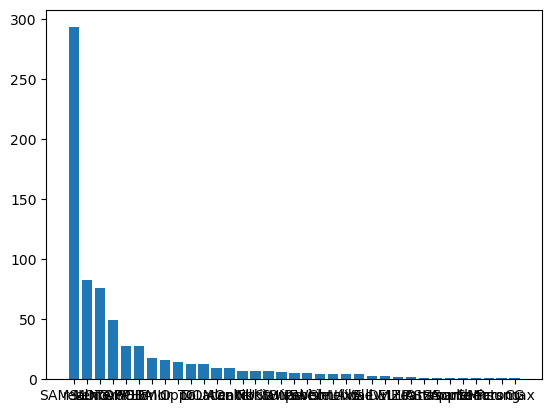

In [162]:
plt.bar(Tablets["Brands"].unique(),Tablets["Brands"].value_counts())

<AxesSubplot:ylabel='Brands'>

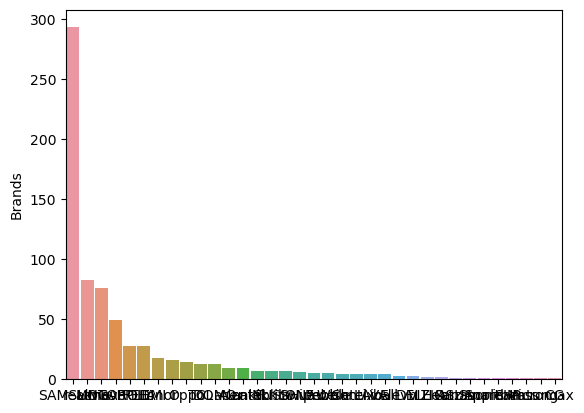

In [165]:
sns.barplot(x=Tablets["Brands"].unique(),y=Tablets["Brands"].value_counts(),width=0.9)

C:\Users\sowjanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Prices', ylabel='Density'>

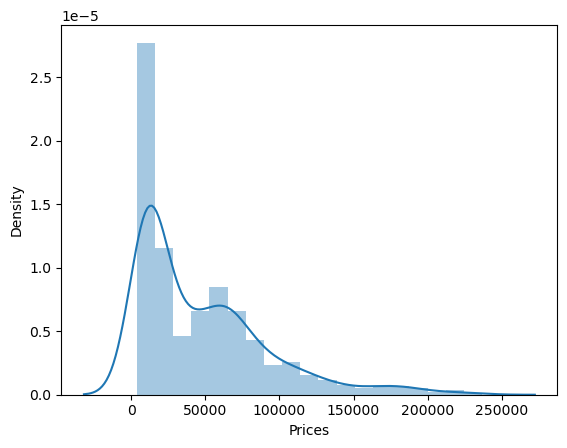

In [131]:
sns.distplot(Tablets['Prices'])

<AxesSubplot:>

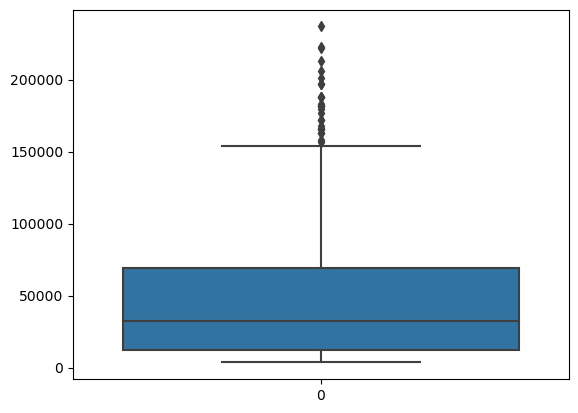

In [132]:
sns.boxplot(Tablets['Prices'])

<AxesSubplot:xlabel='RAM', ylabel='Prices'>

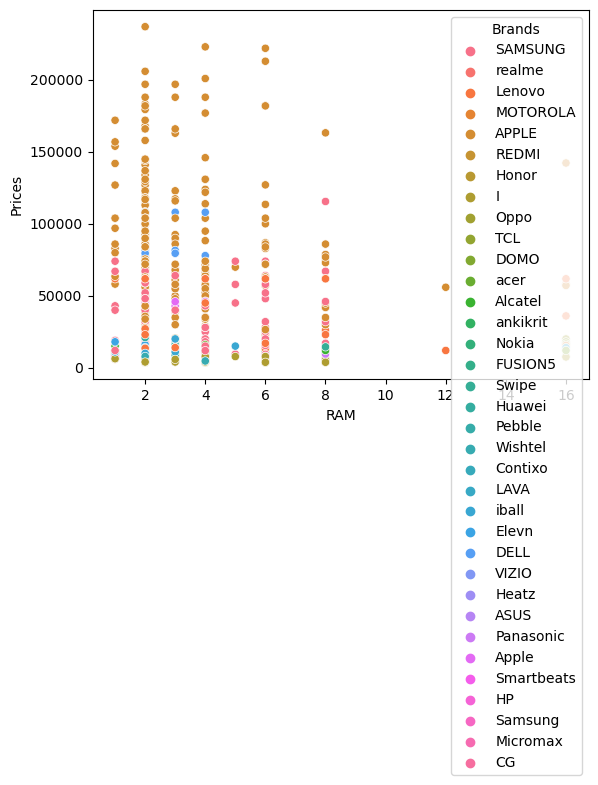

In [135]:
sns.scatterplot(x = Tablets['RAM'], y=Tablets['Prices'],hue=Tablets['Brands'])

<AxesSubplot:>

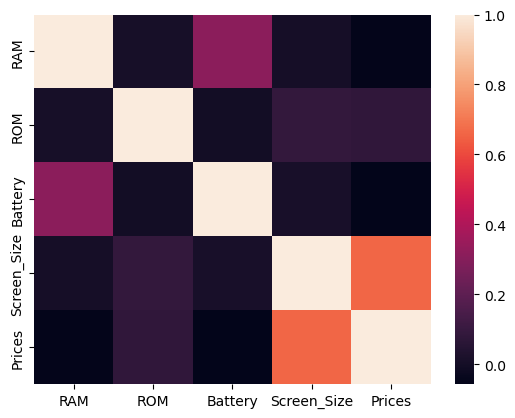

In [136]:
sns.heatmap(Tablets.corr())

In [138]:
Tablets[Tablets['Prices']<=10000]

,Brands,Model,Colors,RAM,ROM,Battery,Screen_Size,Prices
26,realme,Pad,Grey),6,32,6400,22.10,8999
39,I,Kall,White),6,16,7000,17.78,3514
47,I,Kall,White),4,16,7250,17.78,3514
50,I,Kall,White),2,16,2685,17.78,3514
66,I,Kall,Black),2,32,2685,20.32,7399
...,...,...,...,...,...,...,...,...
710,Wishtel,IRA,Black),2,16,2685,17.78,7854
711,I,Kall,"Silver, 8 GB)",4,8,2685,12.70,3999
716,I,Kall,Black),6,4,2685,17.78,3799
717,I,Kall,White),2,4,2685,17.78,3999


In [140]:
Tablets[Tablets['Prices']<=10000].nunique()

Brands         22
Model          47
Colors         45
RAM             8
ROM             9
Battery        32
Screen_Size    11
Prices         43
dtype: int64

<AxesSubplot:xlabel='Prices', ylabel='Count'>

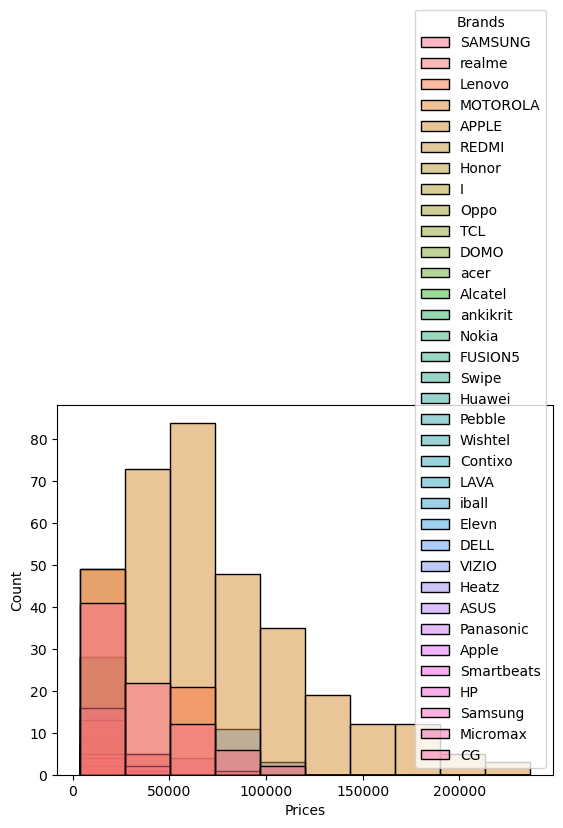

In [151]:
sns.histplot(data=Tablets,x="Prices",bins=10,hue='Brands')

<AxesSubplot:xlabel='Brands', ylabel='count'>

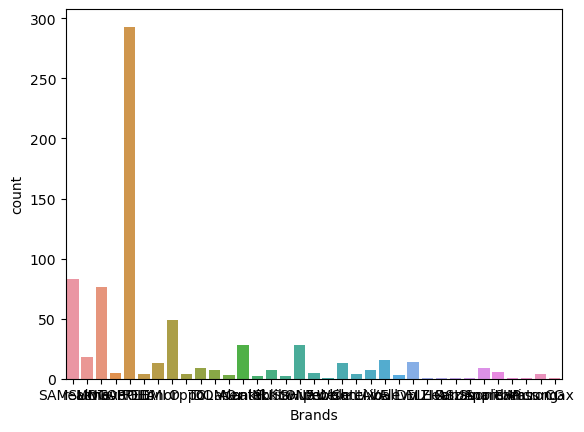

In [152]:
sns.countplot(data=Tablets,x='Brands')

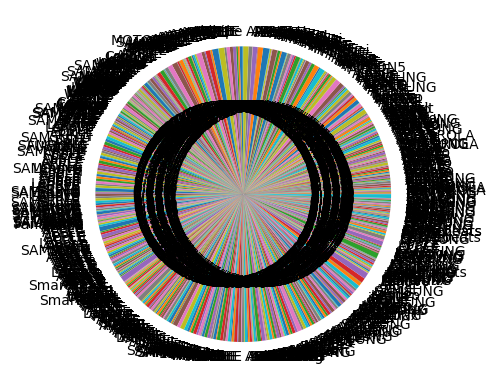

In [154]:
plt.pie(Tablets['Prices'],labels=Tablets['Brands'],autopct='%0.2f%%')
plt.show()

<AxesSubplot:xlabel='RAM', ylabel='Prices'>

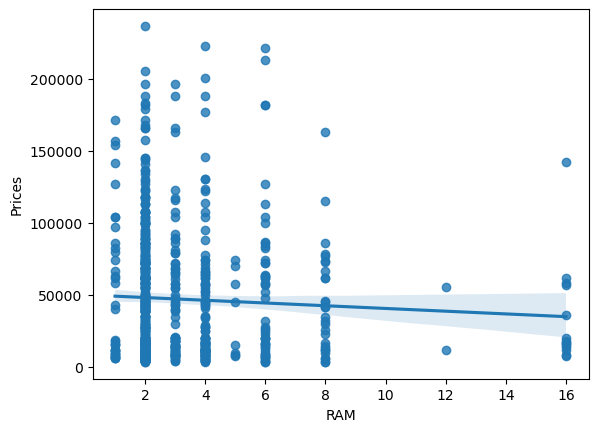

In [160]:
sns.regplot(data=Tablets,x="RAM",y="Prices")

<AxesSubplot:xlabel='Prices', ylabel='Count'>

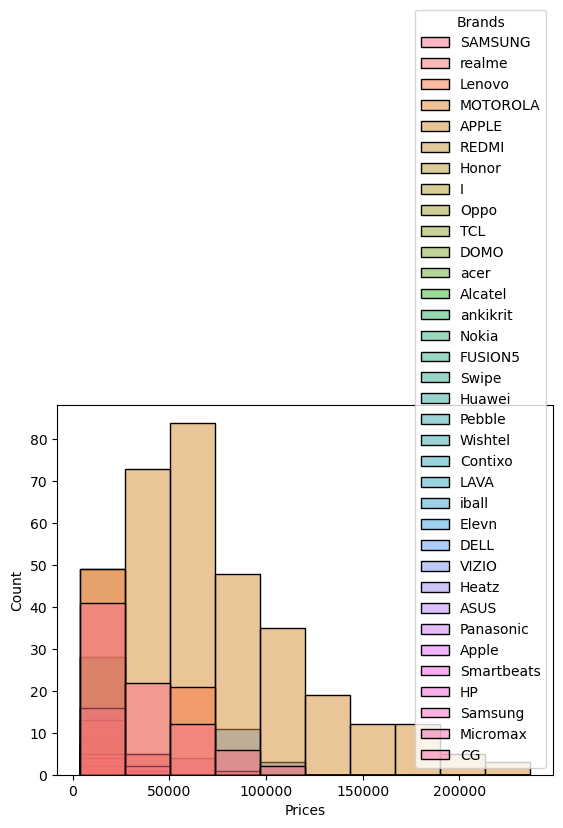

In [161]:
sns.histplot(data=Tablets,x="Prices",bins=10,hue="Brands")